In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [147]:
# Get Mean MAE 
x = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it2.csv", ",", decimal='.')
x = x.groupby(['class'])['mae'].mean()
x

class
A           2378.435278
AMG GT     14638.755312
B           2456.390833
C           3045.542500
CLA         3098.999722
CLS         8235.334848
E           3404.864722
G          28036.464211
GLA         3088.609028
GLB         6897.981212
GLC         4930.826944
GLE         8436.587500
GLS        11622.932174
S          12424.040429
SL          9341.351087
SLC         6174.149655
overall     3264.447917
Name: mae, dtype: float64

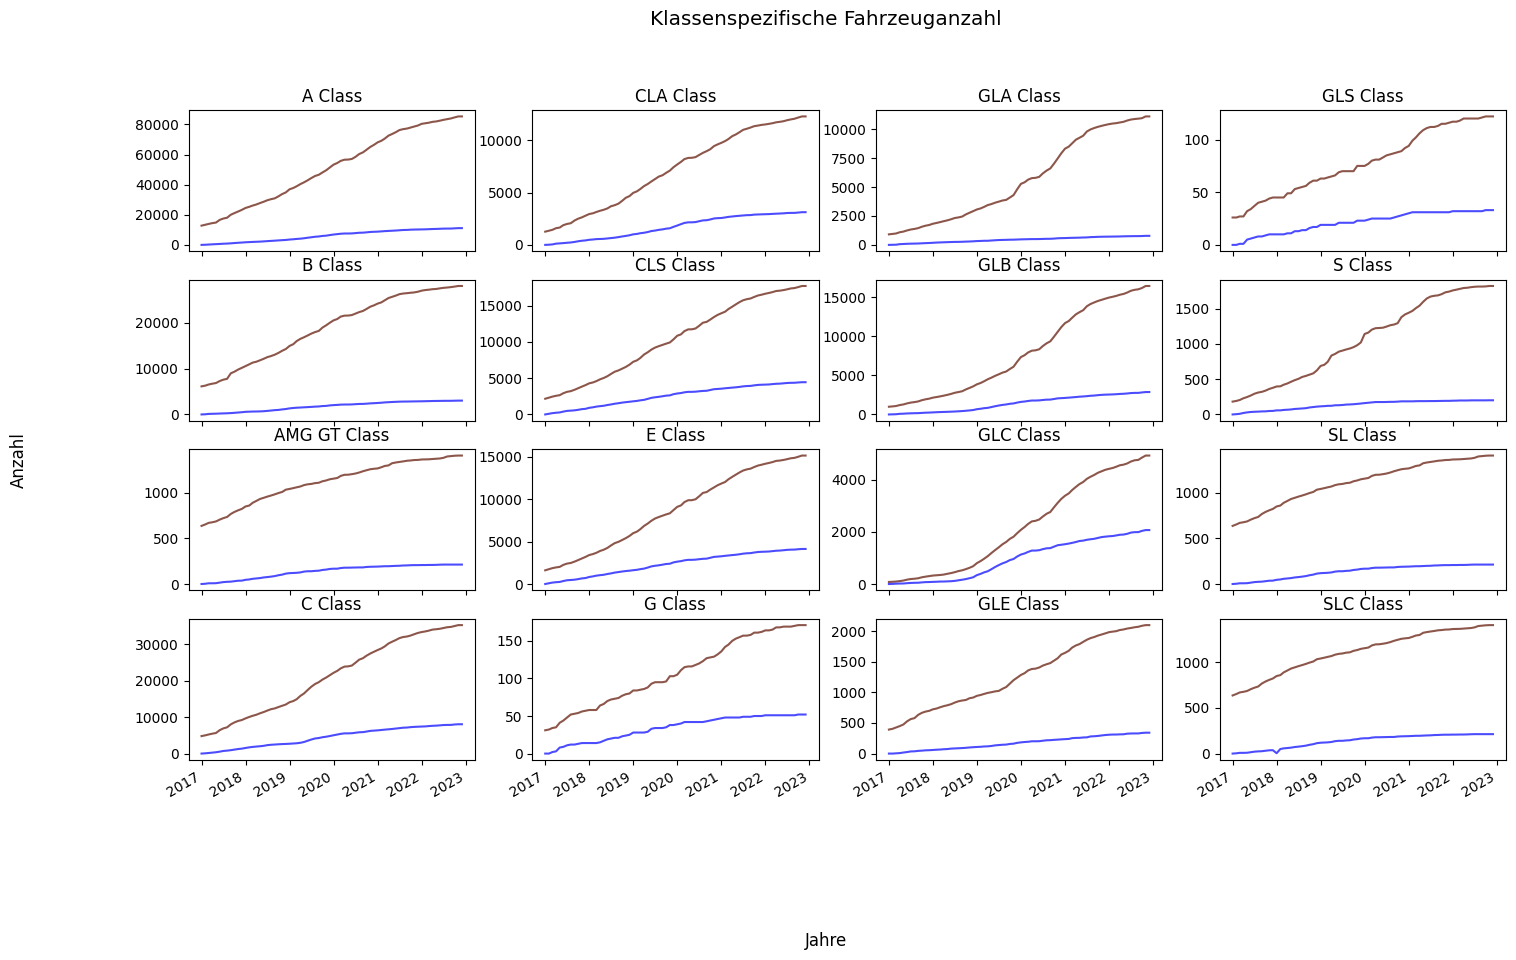

In [88]:
training_set = pd.read_csv("../europa_exploration.csv", ";", decimal='.')
training_set['date']= pd.to_datetime(training_set['date'], format="%Y-%m")
training_set = training_set.set_index('date')
training_set

classes = [ "A", "B", "AMG GT", "C", "CLA", "CLS", "E", "G", "GLA", "GLB", "GLC", "GLE", "GLS", "S", "SL", "SLC"]
ver = [ 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3 ]
hor = [ 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3 ]

fig, axs = plt.subplots(4, 4)

c = 0

for i in classes:

    axs[ver[c],hor[c]].plot(training_set[training_set['class'] == i]['source'], color='tab:brown')
    axs[ver[c],hor[c]].plot(training_set[training_set['class'] == i]['target'], color='b', alpha=0.7)
    axs[ver[c],hor[c]].set_title( classes[c]+" Class")

    c +=1

fig.supxlabel('Jahre')
fig.supylabel('Anzahl')
fig.set_figheight(10)
fig.set_figwidth(17)

# shift subplots down:
st = fig.suptitle("Klassenspezifische Fahrzeuganzahl", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)
ax.xaxis_date()    
fig.autofmt_xdate() 

In [8]:

classes = [ "A", "B", "AMG GT", "C", "CLA", "CLS", "E", "G", "GLA", "GLB", "GLC", "GLE", "GLS", "S", "SL", "SLC"]
ver = [ 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3 ]
hor = [ 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3 ]

c = 0

fig, axs = plt.subplots(4, 4)

for i in classes:

    baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it1.csv", ",", decimal='.')
    baseline = baseline[baseline['class'] == str(classes[c])]
    baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
    baseline = baseline.set_index('prediction_date')

    iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_ada_it1.csv", ",", decimal='.')
    iteration_1 = iteration_1[iteration_1['class'] == str(classes[c])]
    iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
    iteration_1 = iteration_1.set_index('prediction_date')

    x = baseline['mae']
    y = iteration_1['mae']

    axs[ver[c],hor[c]].plot(x, color='tab:brown')
    axs[ver[c],hor[c]].plot(y, color='b', alpha=0.7)
    axs[ver[c],hor[c]].fill_between(baseline.index, x, y, where=(x > y), color='g', alpha=0.3)
    axs[ver[c],hor[c]].fill_between(baseline.index, x, y, where=(x < y), color='r', alpha=0.3)
    axs[ver[c],hor[c]].set_title( classes[c]+" Class")

    c +=1

fig.supxlabel('Jahre')
fig.supylabel('MSE')
fig.set_figheight(10)
fig.set_figwidth(17)

# shift subplots down:
st = fig.suptitle("TrAdaBoost Backtesting - Klassenspezifischer MSE", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)
ax.xaxis_date()     
fig.autofmt_xdate()

NameError: name 'ax' is not defined

In [9]:

classes = [ "A", "B", "AMG GT", "C", "CLA", "CLS", "E", "G", "GLA", "GLB", "GLC", "GLE", "GLS", "S", "SL", "SLC"]
ver = [ 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3 ]
hor = [ 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3 ]

c = 0

fig, axs = plt.subplots(4, 4)

for i in classes:

    baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_baseline_all_markets_no_weights.csv", ",", decimal='.')
    baseline = baseline[baseline['class'] == str(classes[c])]
    baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
    baseline = baseline.set_index('prediction_date')

    iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it1.csv", ",", decimal='.')
    iteration_1 = iteration_1[iteration_1['class'] == str(classes[c])]
    iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
    iteration_1 = iteration_1.set_index('prediction_date')

    x = baseline['mae']
    y = iteration_1['mae']

    axs[ver[c],hor[c]].plot(x, color='tab:brown')
    axs[ver[c],hor[c]].plot(y, color='b', alpha=0.7)
    axs[ver[c],hor[c]].fill_between(baseline.index, x, y, where=(x > y), color='g', alpha=0.3)
    axs[ver[c],hor[c]].fill_between(baseline.index, x, y, where=(x < y), color='r', alpha=0.3)
    axs[ver[c],hor[c]].set_title( classes[c]+" Class")

    c +=1

fig.supxlabel('Jahre')
fig.supylabel('MSE')
fig.set_figheight(10)
fig.set_figwidth(17)

# shift subplots down:
st = fig.suptitle("KMM Backtesting - Klassenspezifischer MSE", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)
ax.xaxis_date()     
fig.autofmt_xdate() 

NameError: name 'ax' is not defined

# Visualize KMM results

In [7]:
baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_baseline_all_markets_no_weights.csv", ",", decimal='.')
baseline = baseline[baseline['class'] == "overall"]
baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
baseline = baseline.set_index('prediction_date')

iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it1.csv", ",", decimal='.')
iteration_1 = iteration_1[iteration_1['class'] == "overall"]
iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
iteration_1 = iteration_1.set_index('prediction_date')

iteration_2 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it2.csv", ",", decimal='.')
iteration_2 = iteration_2[iteration_2['class'] == "overall"]
iteration_2['prediction_date']= pd.to_datetime(iteration_2['prediction_date'], format="%Y-%m")
iteration_2 = iteration_2.set_index('prediction_date')

iteration_3 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_kmm_it3.csv", ",", decimal='.')
iteration_3 = iteration_3[iteration_3['class'] == "overall"]
iteration_3['prediction_date']= pd.to_datetime(iteration_3['prediction_date'], format="%Y-%m")
iteration_3 = iteration_3.set_index('prediction_date')

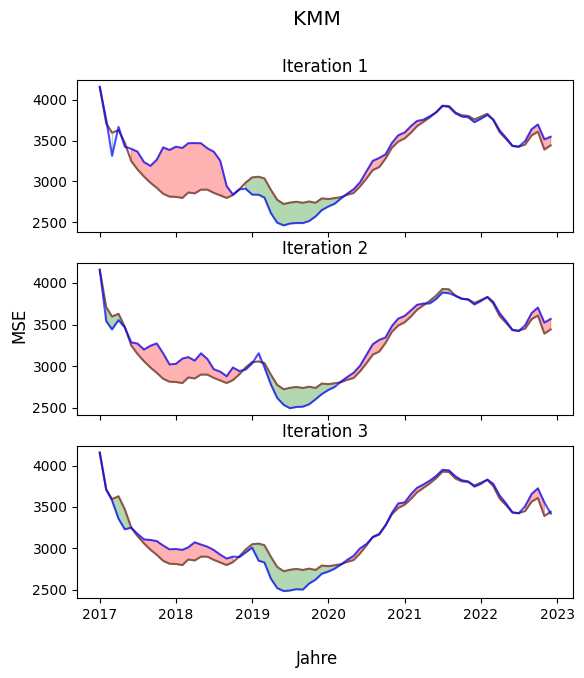

In [143]:

    fig, axs = plt.subplots(3, 1)

    axs[0].plot(baseline['mae'], color='tab:brown')
    axs[0].plot(iteration_1['mae'], color='b', alpha=0.7)
    axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] > iteration_1['mae']), color='g', alpha=0.3)
    axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] < iteration_1['mae']), color='r', alpha=0.3)
    axs[0].set_title("Iteration 1")

    axs[1].plot(baseline['mae'], color='tab:brown')
    axs[1].plot(iteration_2['mae'], color='b', alpha=0.7)
    axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] > iteration_2['mae']), color='g', alpha=0.3)
    axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] < iteration_2['mae']), color='r', alpha=0.3)
    axs[1].set_title("Iteration 2")

    axs[2].plot(baseline['mae'], color='tab:brown')
    axs[2].plot(iteration_3['mae'], color='b', alpha=0.7)
    axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] > iteration_3['mae']), color='g', alpha=0.3)
    axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] < iteration_3['mae']), color='r', alpha=0.3)
    axs[2].set_title("Iteration 3")


    fig.supxlabel('Jahre')
    fig.supylabel('MSE')
    fig.set_figheight(7,5)

    st = fig.suptitle("KMM", fontsize="x-large")
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)

    for ax in axs.flat:
        ax.label_outer()

# Visualize TrAdaBoost results

In [149]:
baseline = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_baseline_all_markets_no_weights.csv", ",", decimal='.')
baseline = baseline[baseline['class'] == "overall"]
baseline['prediction_date']= pd.to_datetime(baseline['prediction_date'], format="%Y-%m")
baseline = baseline.set_index('prediction_date')

iteration_1 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_ada_it1.csv", ",", decimal='.')
iteration_1 = iteration_1[iteration_1['class'] == "overall"]
iteration_1['prediction_date']= pd.to_datetime(iteration_1['prediction_date'], format="%Y-%m")
iteration_1 = iteration_1.set_index('prediction_date')

iteration_2 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_ada_it2.csv", ",", decimal='.')
iteration_2 = iteration_2[iteration_2['class'] == "overall"]
iteration_2['prediction_date']= pd.to_datetime(iteration_2['prediction_date'], format="%Y-%m")
iteration_2 = iteration_2.set_index('prediction_date')

iteration_3 = pd.read_csv("../backtesting_results_BE_Europe BE_pfv_ada_it3.csv", ",", decimal='.')
iteration_3 = iteration_3[iteration_3['class'] == "overall"]
iteration_3['prediction_date']= pd.to_datetime(iteration_3['prediction_date'], format="%Y-%m")
iteration_3 = iteration_3.set_index('prediction_date')

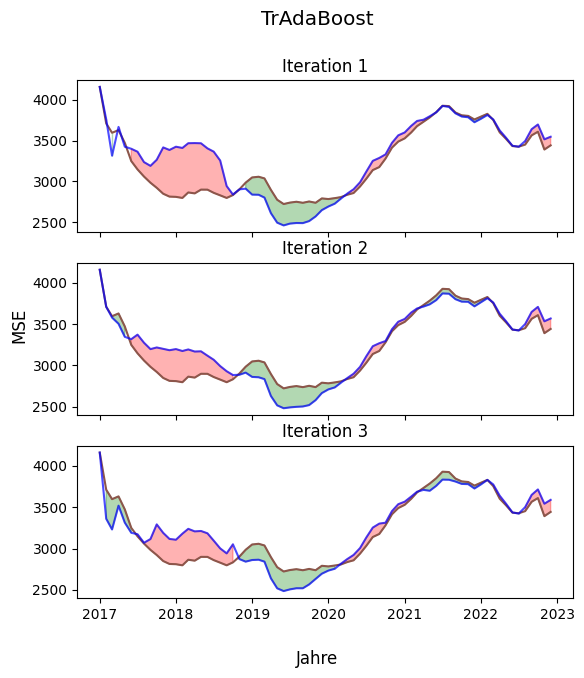

In [150]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1)

axs[0].plot(baseline['mae'], color='tab:brown')
axs[0].plot(iteration_1['mae'], color='b', alpha=0.7)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] > iteration_1['mae']), color='g', alpha=0.3)
axs[0].fill_between(baseline.index, baseline['mae'], iteration_1['mae'], where=(baseline['mae'] < iteration_1['mae']), color='r', alpha=0.3)
axs[0].set_title("Iteration 1")

axs[1].plot(baseline['mae'], color='tab:brown')
axs[1].plot(iteration_2['mae'], color='b', alpha=0.7)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] > iteration_2['mae']), color='g', alpha=0.3)
axs[1].fill_between(baseline.index, baseline['mae'], iteration_2['mae'], where=(baseline['mae'] < iteration_2['mae']), color='r', alpha=0.3)
axs[1].set_title("Iteration 2")

axs[2].plot(baseline['mae'], color='tab:brown')
axs[2].plot(iteration_3['mae'], color='b', alpha=0.7)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] > iteration_3['mae']), color='g', alpha=0.3)
axs[2].fill_between(baseline.index, baseline['mae'], iteration_3['mae'], where=(baseline['mae'] < iteration_3['mae']), color='r', alpha=0.3)
axs[2].set_title("Iteration 3")

st = fig.suptitle("TrAdaBoost", fontsize="x-large")
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

fig.supxlabel('Jahre')
fig.supylabel('MSE')
fig.set_figheight(7,5) 

for ax in axs.flat:
    ax.label_outer()